In [ ]:
# import library
import numpy as np
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive

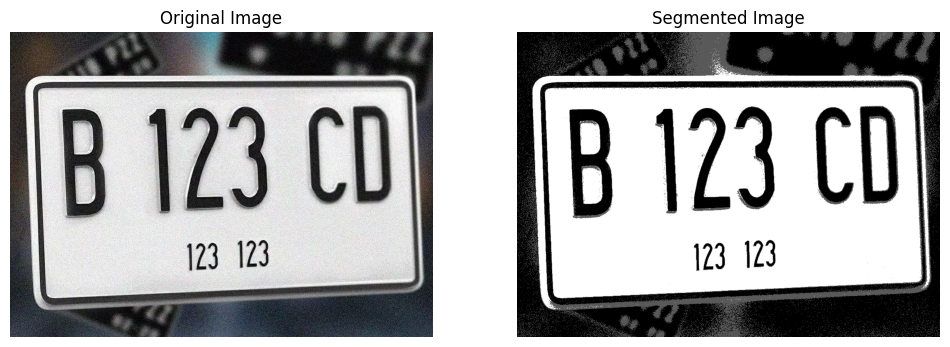

In [ ]:
# Load the license plate image
image_path = '/content/drive/MyDrive/dummy/019_jpg.rf.e73938ec62074bbde822f7d5a084bdef.jpg'
original_image = cv2.imread(image_path)

# Convert the image to grayscale (you can choose a different color space if needed)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply K-Means clustering to segment the license plate
# You can adjust the number of clusters (K) based on your specific image
K = 3  # Number of clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(gray_image.reshape(-1, 1).astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_image = centers[labels.flatten()].reshape(gray_image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')

plt.show()

In [ ]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# Load the original license plate image (in grayscale)
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the segmented image to grayscale
segmented_image_gray = segmented_image.astype(np.uint8)

# Calculate SSIM
ssim_score = ssim(original_image, segmented_image_gray)

# Calculate MSE
mse = mean_squared_error(original_image, segmented_image_gray)

print(f"SSIM: {ssim_score:.2f}")
print(f"MSE: {mse:.2f}")

SSIM: 0.46
MSE: 84.83


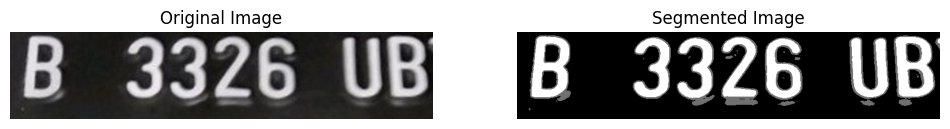

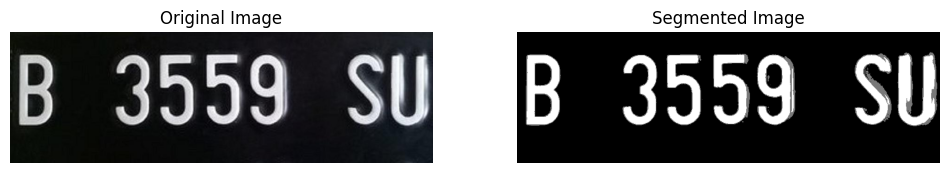

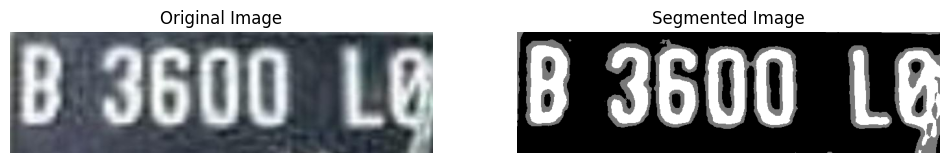

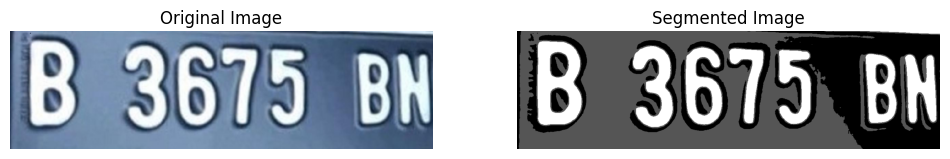

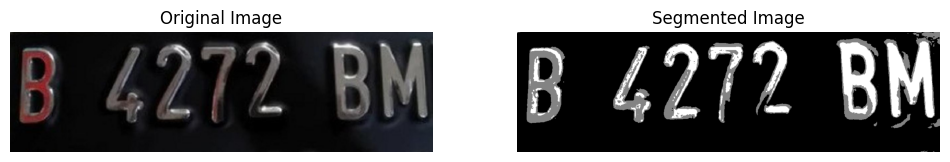

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define a list of image file paths
image_paths = [
    '/content/drive/MyDrive/dummy/B3326UB_png.rf.ae55e0c0bf99c732265edf021f844bf9.jpg',
    '/content/drive/MyDrive/dummy/B3559SU_png.rf.da969620aaf4665b616f8f677a9a6201.jpg',
    '/content/drive/MyDrive/dummy/B3600LO_png.rf.5eb980772646a9fdac8faa4c9c315ada.jpg',
    '/content/drive/MyDrive/dummy/B3675BN_png.rf.9600a7928b9a7189a89e2cd84ce0e43c.jpg',
    '/content/drive/MyDrive/dummy/B4272BM_png.rf.5dd321699f542ea7b394ce1aa70034d6.jpg'
]

# Define the number of clusters (K)
K = 3  # Number of clusters

for image_path in image_paths:
    # Load the license plate image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply K-Means clustering to segment the license plate
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(gray_image.reshape(-1, 1).astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    segmented_image = centers[labels.flatten()].reshape(gray_image.shape)

    # Display the original and segmented images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='gray')
    plt.title("Segmented Image")
    plt.axis('off')

    plt.show()